In [11]:
import glob, os
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
from langchain_groq import ChatGroq

os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pinecone import Pinecone
os.environ["PINECONE_API_KEY"] = os.getenv("PINECONE_API_KEY")

pinecone_api_key = os.getenv("PINECONE_API_KEY")

In [4]:
pc = Pinecone(api_key=pinecone_api_key)

In [5]:
index_name = "samsung-db"

index = pc.Index(index_name)
index

In [7]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(index=index, embedding=embeddings)
vector_store.similarity_search("tell me about samsung s23 ultra")

[Document(id='9c63bf7f-c54f-4087-8f0c-49926e76ed67', metadata={'phone_brand': 'samsung', 'phone_name': 'samsung_galaxy_s23_ultra'}, page_content='--- Name ---\nSamsung Galaxy S23 Ultra\n\n--- Network ---\nTechnology: GSM / CDMA / HSPA / EVDO / LTE / 5G\n2G bands: GSM 850 / 900 / 1800 / 1900\n: 1, 7, 28, 41, 66, 71, 78, 258, 260, 261 SA/NSA/Sub6/mmWave - USA\n3G bands: HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100\n4G bands: 1, 2, 3, 4, 5, 7, 8, 12, 13, 17, 18, 19, 20, 25, 26, 28, 32, 38, 39, 40, 41, 66 - International\n5G bands: 1, 2, 3, 5, 7, 8, 12, 20, 25, 28, 38, 40, 41, 66, 75, 77, 78 SA/NSA/Sub6 - International\nSpeed: HSPA, LTE (up to 7CA), 5G\n\n--- Launch ---\nAnnounced: 2023, February 01\nStatus: Available. Released 2023, February 17\n\n--- Body ---\nDimensions: 163.4 x 78.1 x 8.9 mm (6.43 x 3.07 x 0.35 in)\nWeight: 234 g (8.25 oz)\nBuild: Glass front (Gorilla Glass Victus 2), glass back (Gorilla Glass Victus 2), aluminum frame\nSIM: Nano-SIM + eSIMNano-SIM + Nano-SIM + eSIM (max 

## Data extraction from MySQL database

In [1]:
import mysql.connector
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='device_specs_db'
)

In [2]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost/device_specs_db')

In [3]:
from sqlalchemy import text
import pandas as pd

phone_name = "Samsung Galaxy A06 5G"
query = text("SELECT * FROM samsung_phone WHERE phone_name = :phone_name")
df = pd.read_sql(query, con=engine, params={"phone_name": phone_name})

print(df.head())

              phone_name     network_technology             network_2g_bands  \
0  Samsung Galaxy A06 5G  GSM / HSPA / LTE / 5G  GSM 850 / 900 / 1800 / 1900   

                            network_3g_bands  \
0  HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100   

                                    network_4g_bands  \
0  1, 2, 3, 4, 5, 7, 8, 12, 17, 20, 26, 28, 38, 4...   

                                    network_5g_bands  network_speed  \
0  1, 3, 5, 7, 8, 26, 28, 40, 41, 66, 77, 78 SA/N...  HSPA, LTE, 5G   

    launch_announced                          launch_status  \
0  2025, February 19  Available. Released 2025, February 19   

                               body_dimensions  ... comms_bluetooth  \
0  167.3 x 77.3 x 8 mm (6.59 x 3.04 x 0.31 in)  ...   5.3, A2DP, LE   

            comms_positioning comms_nfc  comms_radio       comms_usb  \
0  GPS, GLONASS, GALILEO, BDS        No  Unspecified  USB Type-C 2.0   

                                    features_sensors battery_type  \
0 

In [16]:
context_str = df.iloc[0].to_string()
context_str

'phone_name                                          Samsung Galaxy A06 5G\nnetwork_technology                                  GSM / HSPA / LTE / 5G\nnetwork_2g_bands                              GSM 850 / 900 / 1800 / 1900\nnetwork_3g_bands                HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100\nnetwork_4g_bands        1, 2, 3, 4, 5, 7, 8, 12, 17, 20, 26, 28, 38, 4...\nnetwork_5g_bands        1, 3, 5, 7, 8, 26, 28, 40, 41, 66, 77, 78 SA/N...\nnetwork_speed                                               HSPA, LTE, 5G\nlaunch_announced                                        2025, February 19\nlaunch_status                       Available. Released 2025, February 19\nbody_dimensions               167.3 x 77.3 x 8 mm (6.59 x 3.04 x 0.31 in)\nbody_weight                                               191 g (6.74 oz)\nbody_build                       Glass front, plastic back, plastic frame\nbody_sim                                              Nano-SIM + Nano-SIM\ndisplay_type            

In [53]:
type(context_str)

str

In [4]:
from pydantic import BaseModel, Field
from typing import Annotated

class PhoneName(BaseModel):
    """This class is responsible for extract the phone name form the user query."""
    
    phone_name: Annotated[str, Field(description="Extract the phone name only form the user query and follow this rule: each word starts with a capital letter, numbers and suffixes are as in model name")]

In [7]:
from langchain_core.output_parsers import PydanticOutputParser
phone_name_parser = PydanticOutputParser(pydantic_object=PhoneName)

In [8]:
from langchain_core.prompts import PromptTemplate


phone_name_prompt = PromptTemplate(
    template="""
You are an AI assistant responsible for extracting phone names from user queries about Samsung phones.

Your task:
- Extract the exact phone name mentioned in the user's query.
- The phone name must follow this style: each word starts with a capital letter, numbers and suffixes are as in the model name.
- Return only the phone name in the structured format expected by the system (do not include any extra text or explanation).

Examples:

User query: "Tell me about the samsung galaxy s23 ultra"
Extracted phone_name: "Samsung Galaxy S23 Ultra"

User query: "What is the battery life of the galaxy a06 5g?"
Extracted phone_name: "Samsung Galaxy A06 5G"

User query: "Give specs for samsung galaxy m15"
Extracted phone_name: "Samsung Galaxy M15"

---

Now extract the phone name from this user query:

User query: {question}

Return the result as a this output format instruction: {format_instruction}
""",
    input_variables=["question"],
    partial_variables={
            "format_instruction": phone_name_parser.get_format_instructions()
        }
)




In [13]:
chain = phone_name_prompt | llm | phone_name_parser
response = chain.invoke("Tell me about the samsung galaxy s23 ultra")
response

PhoneName(phone_name='Samsung Galaxy S23 Ultra')

In [14]:
response.phone_name

'Samsung Galaxy S23 Ultra'

## Now time to build the Multi Agent Workflow

In [62]:
from langgraph.graph import MessagesState
from sqlalchemy import text
import pandas as pd

from typing import TypedDict, Sequence
from langchain_core.messages import BaseMessage
import operator

class State(TypedDict):
    """This is is my graph state where store all conversations."""
    messages: Annotated[Sequence[BaseMessage], operator.add]
    phone_name: str

In [63]:
def data_extraction(state: State):
    print("--Data extraction--")
    question = state["messages"][-1]
    
    ## query into the db
    response = chain.invoke(question)

    phone_name = response.phone_name
    
    query = text("SELECT * FROM samsung_phone WHERE phone_name = :phone_name")
    df = pd.read_sql(query, con=engine, params={"phone_name": phone_name})
    context_str = df.iloc[0].to_string()
    print("---Data extraction done---")
    
    # print(context_str)
    return {
        "phone_name": context_str
    }

    

In [64]:
from langchain_core.prompts import PromptTemplate

review_prompt = PromptTemplate(
    template="""
You are the world's best phone reviewer, known for writing engaging, insightful, and professional reviews that captivate readers.

Your task:
- Use the provided phone context to generate a detailed, interesting, and natural-sounding review as a professional reviewer would write.
- The review should directly address the user's question when possible.
- Highlight key specs, features, and notable aspects that would matter to buyers (e.g., network, display, battery, camera, design).
- Make the review flow smoothly — not as a list of specs but as a narrative that excites readers.
- If the context is empty or missing important information, simply say:  
**"This phone is not available in our store."**  
Do not attempt to guess or generate fake details.

---

📌 **User Question:**  
{question}

📌 **Phone Context (use this for your review):**  
{context}
""",
    input_variables=["question", "context"]
)


In [47]:
from langchain_core.output_parsers import StrOutputParser

In [74]:
def review_generate(state: State):
    print("--Review generate--")
    question = state['messages'][-1]
    phone_context = state["phone_name"]
    print(question)
    # print(phone_context)
    
    review_chain = review_prompt | llm | StrOutputParser()
    # response = llm.invoke(question)
    
    response = review_chain.invoke(
        {
            "question": question,
            "context": phone_context
        }
    )
    
    return {
        "messages": [response]
    }
    

## Define the Graph

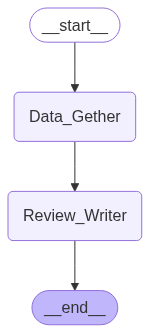

In [79]:
from langgraph.graph import START, END, StateGraph
from IPython.display import display, Image, Markdown

builder = StateGraph(State)

builder.add_node("Data_Gether", data_extraction)
builder.add_node("Review_Writer", review_generate)

## Define edges
builder.add_edge(START, "Data_Gether")
builder.add_edge("Data_Gether", "Review_Writer")
builder.add_edge("Review_Writer", END)

app = builder.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [77]:
output = app.invoke(
    {
        "messages": ["Please write review to samsung galaxy s23 ultra phone"]
    }
)

--Data extraction--
---Data extraction done---
--Review generate--
Please write review to samsung galaxy s23 ultra phone


In [80]:
Markdown(output["messages"][-1])

**Samsung Galaxy S23 Ultra Review: A Powerhouse of Innovation**

In the world of smartphones, the Samsung Galaxy S23 Ultra stands out as a behemoth of technology and innovation. Released on February 17, 2023, this device has been making waves with its impressive specs and features that cater to both power users and those seeking a premium mobile experience. Let's dive into what makes the Galaxy S23 Ultra a top contender in the flagship market.

**Design and Display**

The Galaxy S23 Ultra boasts a stunning 6.8-inch Dynamic AMOLED 2X display, capable of reaching 120Hz refresh rates and an astonishing 1200 nits of peak brightness. This HDR10+ certified screen offers vivid colors, deep blacks, and an overall viewing experience that's hard to match. The phone's glass front and back, protected by Gorilla Glass Victus 2, give it a premium feel, while its IP67 rating ensures it can withstand dust and water. At 234g, the device feels substantial but not overly heavy, considering the powerhouse within.

**Performance**

Under the hood, the Qualcomm SM8550-AC Snapdragon 8 Gen2 chipset, built on a 4nm process, provides the brains and the brawn. This octa-core processor, coupled with Adreno 740 GPU, handles everything from demanding games to multitasking with ease. With up to 12GB of RAM and options ranging from 256GB to 512GB of internal storage, the Galaxy S23 Ultra is well-equipped to handle any task you throw at it. And with Android 13 out of the box, along with a promise of up to four major Android upgrades, users can enjoy the latest software features for years to come.

**Camera Capabilities**

The camera system on the Galaxy S23 Ultra is nothing short of spectacular. The main sensor boasts an impressive setup with Laser AF, LED flash, auto-HDR, and panorama features. It can record 8K video at 24/30fps, 4K at 30/60fps, and slow-motion videos up to 240fps. The 12MP front camera doesn't disappoint either, offering 4K video recording and a wide-angle lens perfect for selfies and video calls.

**Battery Life and Charging**

A 5000mAh battery powers the Galaxy S23 Ultra, and with 45W wired charging (reaching 65% in just 30 minutes), 15W wireless charging, and reverse wireless charging, staying powered up is quick and convenient.

**Connectivity and Extras**

In terms of connectivity, this phone has it all: 5G and 4G support across a wide range of bands, Wi-Fi 6e, tri-band, Bluetooth 5.3, NFC, and a USB Type-C 3.2 port. The under-display ultrasonic fingerprint sensor provides fast and secure biometric authentication.

**Conclusion**

The Samsung Galaxy S23 Ultra is more than just a smartphone; it's a statement of what mobile technology can achieve. With its top-of-the-line specs, exceptional display, versatile camera system, and robust battery life, it's a device that's hard to beat. Whether you're a professional looking for a reliable workhorse, a gamer seeking high-performance, or simply someone who wants the best of the best, the Galaxy S23 Ultra is an excellent choice.

**Rating:** 5/5

**Recommendation:** If you're due for an upgrade or are in the market for a premium Android device that ticks all the boxes, the Samsung Galaxy S23 Ultra is undoubtedly worth considering. Its price may reflect its high-end status, but for those who value performance, camera quality, and future-proof features, it's an investment that will serve well for years to come.